In [114]:
import pandas as pd
import numpy as np

In [115]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [116]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [117]:
data.shape

(5572, 5)

In [118]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Model Evaluation
# 6. Improvements
# 7. website 
# 8. Deployment

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [120]:
data.drop('Unnamed: 3', axis=1, inplace=True)
data.drop('Unnamed: 4', axis=1, inplace=True)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
dtypes: object(3)
memory usage: 130.7+ KB


In [122]:
# renaming the columns
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [123]:
data

,target,text,Unnamed: 2
0,ham,"Go until jurong point, crazy.. Available only ...",NaN
1,ham,Ok lar... Joking wif u oni...,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,ham,U dun say so early hor... U c already then say...,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN


In [124]:
# label encoding the target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   
data['target'] = le.fit_transform(data['target'])

In [125]:
data

,target,text,Unnamed: 2
0,0,"Go until jurong point, crazy.. Available only ...",NaN
1,0,Ok lar... Joking wif u oni...,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,0,U dun say so early hor... U c already then say...,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN


In [126]:
data.isnull().sum()

target           0
text             0
Unnamed: 2    5522
dtype: int64

In [127]:
data.duplicated().sum()

403

In [128]:
# remove the duplicates
data = data.drop_duplicates(keep='first')

2. EDA

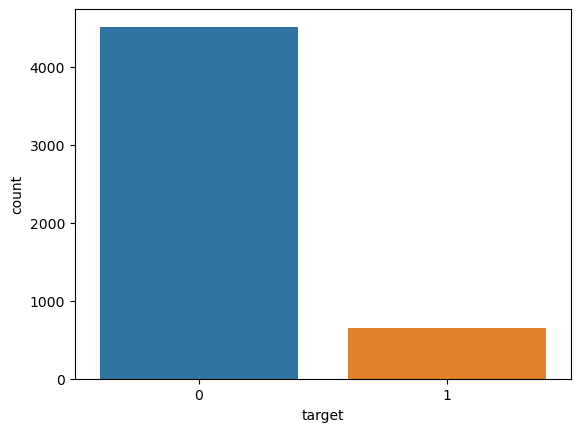

In [129]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.countplot(x = 'target', data = data)
plt.show()

In [130]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1faa7071990>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

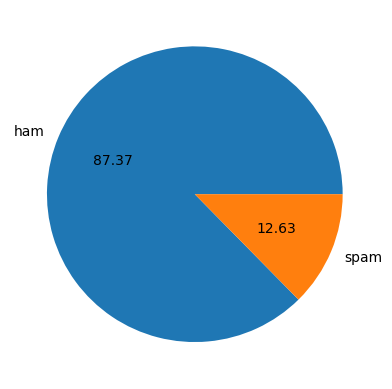

In [131]:
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

In [132]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

In [133]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tyagi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tyagi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
data['num_characters'] = data['text'].apply(len)

C:\Users\tyagi\AppData\Local\Temp\ipykernel_22120\2310173184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters'] = data['text'].apply(len)


In [135]:
data

,target,text,Unnamed: 2,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,161
5568,0,Will Ì_ b going to esplanade fr home?,NaN,37
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,57
5570,0,The guy did some bitching but I acted like i'd...,NaN,125


In [136]:
data['num_words'] = (data['text'].apply(word_tokenize).apply(len))

C:\Users\tyagi\AppData\Local\Temp\ipykernel_22120\2691054692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = (data['text'].apply(word_tokenize).apply(len))


In [137]:
data.drop(['Unnamed: 2'], axis=1, inplace=True)
data

C:\Users\tyagi\AppData\Local\Temp\ipykernel_22120\2398303261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Unnamed: 2'], axis=1, inplace=True)


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [138]:

data['num_sentences'] = data['text'].apply(sent_tokenize).apply(len)

C:\Users\tyagi\AppData\Local\Temp\ipykernel_22120\299575888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences'] = data['text'].apply(sent_tokenize).apply(len)


In [139]:
data

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [140]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [141]:
data[data['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [142]:
data[data['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


c:\Users\tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

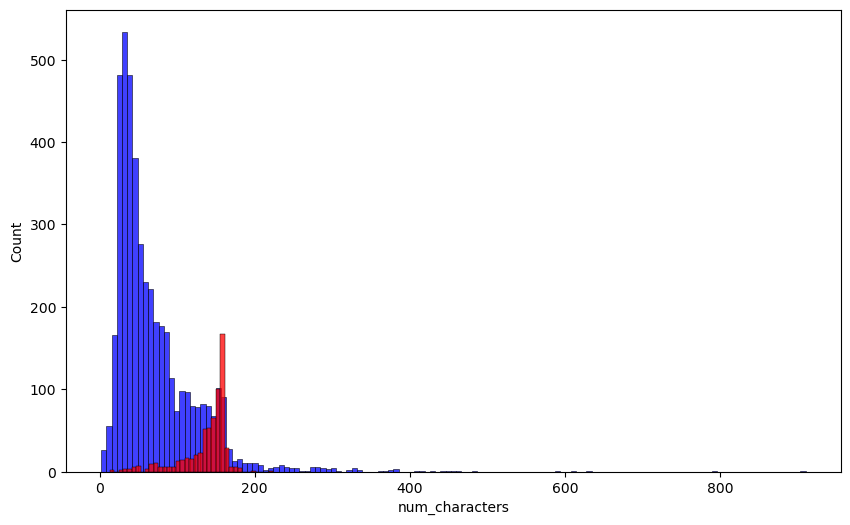

In [143]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['target']==0]['num_characters'], color='blue', label='ham')
sns.histplot(data[data['target']==1]['num_characters'], color='red', label='spam')

c:\Users\tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

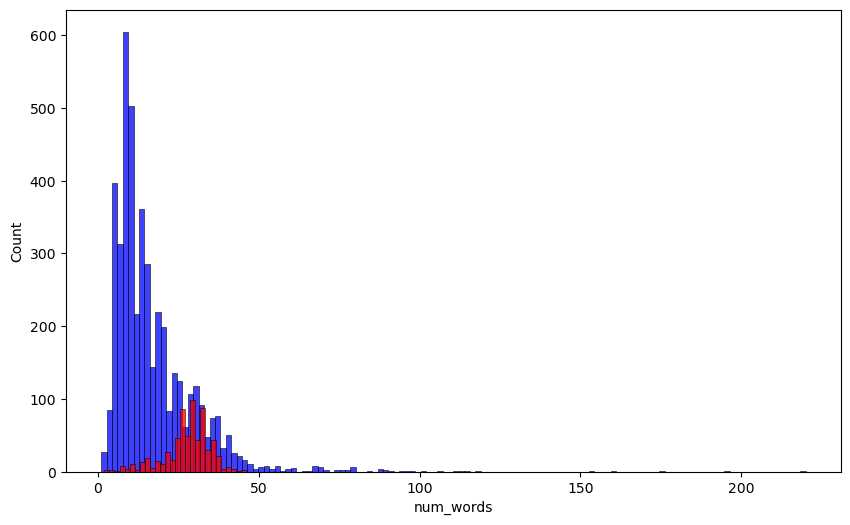

In [144]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['target']==0]['num_words'], color='blue', label='ham')
sns.histplot(data[data['target']==1]['num_words'], color='red', label='spam')

<Axes: >

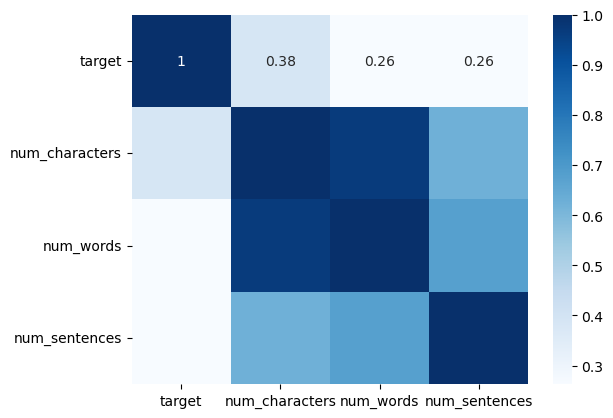

In [145]:
sns.heatmap(data.corr('pearson', numeric_only=True), annot=True, cmap='Blues')

# 3. DATA PREPROCESSING
Lower case/
Tokenization/
Removing special characters/
Removing stopwords and punctuations/
Stemming

In [146]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [147]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
       y.append(ps.stem(i))

    return " ".join(y)

In [148]:
data['transformed_text'] = data['text'].apply(transform)

C:\Users\tyagi\AppData\Local\Temp\ipykernel_22120\266363599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['text'].apply(transform)


In [149]:
data

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [150]:
!pip install wordcloud

In [151]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(data['transformed_text'].str.cat(sep=' '))

In [152]:
spam_w = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=' '))
ham_w = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=' '))

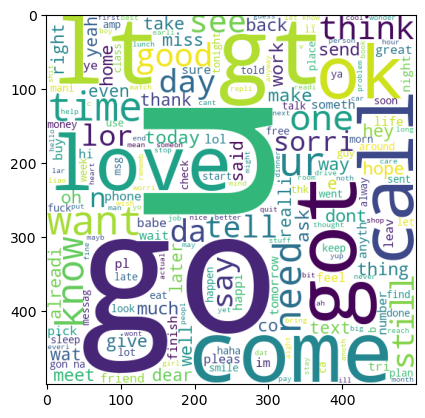

In [153]:
plt.imshow(spam_w)

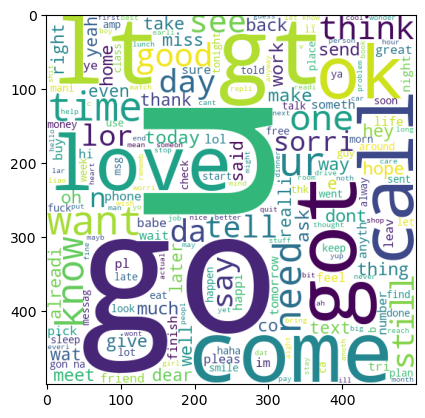

In [154]:
plt.imshow(ham_w)

In [155]:
spam_corpus = []
for msgs in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msgs.split():
        spam_corpus.append(word)    

In [156]:
len(spam_corpus)

9939

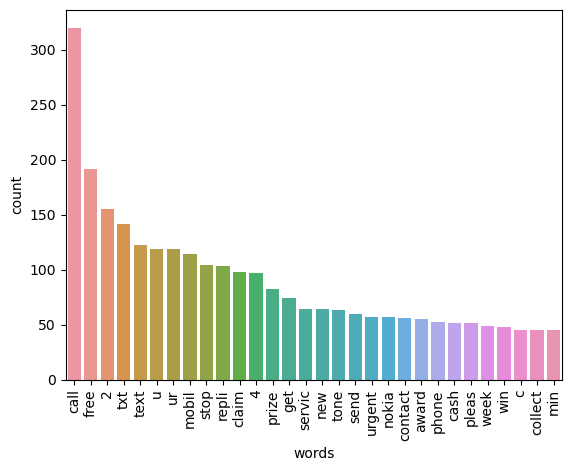

In [157]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['words', 'count']).sort_values('count', ascending=False).head(30), x='words', y='count')
plt.xticks(rotation='vertical')
plt.show()

In [158]:
ham_corpus = []
for msgs in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msgs.split():
        ham_corpus.append(word)    

In [159]:
len(ham_corpus)

35404

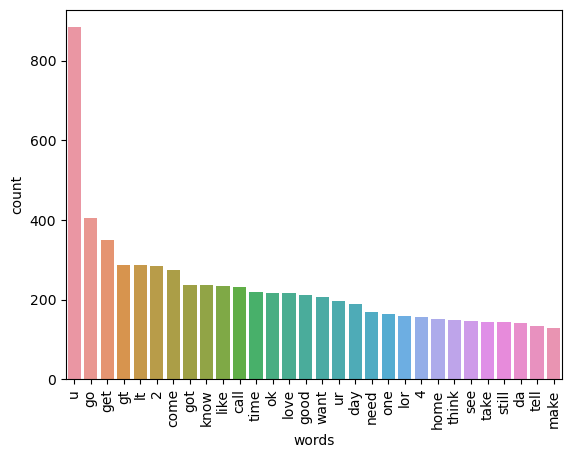

In [160]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['words', 'count']).sort_values('count', ascending=False).head(30), x='words', y='count')
plt.xticks(rotation='vertical')
plt.show()

## Model building



In [161]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [162]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [163]:
X.shape

(5169, 6708)

In [164]:
y = data['target'].values

In [165]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [167]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [168]:
gnb = GaussianNB()
mnb = MultinomialNB()   
bnb = BernoulliNB()

In [169]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred1))
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("GaussianNB Precision:", precision_score(y_test, y_pred1))

GaussianNB Accuracy: 0.8636363636363636
GaussianNB Confusion Matrix:
 [[772 117]
 [ 24 121]]
GaussianNB Precision: 0.5084033613445378


In [170]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)   
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred2))
print("MultinomialNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("MultinomialNB Precision:", precision_score(y_test, y_pred2))

MultinomialNB Accuracy: 0.9613152804642167
MultinomialNB Confusion Matrix:
 [[888   1]
 [ 39 106]]
MultinomialNB Precision: 0.9906542056074766


In [171]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)   
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred3))
print("BernoulliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("BernoulliNB Precision:", precision_score(y_test, y_pred3))   


BernoulliNB Accuracy: 0.9661508704061895
BernoulliNB Confusion Matrix:
 [[885   4]
 [ 31 114]]
BernoulliNB Precision: 0.9661016949152542


In [172]:
# used tfidf and then multinomial naive bayes for better accuracy

In [173]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))